# Machine Learning

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


plt.rcParams['font.sans-serif'] = ['SimHei']  

plt.rcParams['axes.unicode_minus'] = False

In [93]:
df = pd.read_csv('Variable_final.csv')

In [94]:
object_columns = ['SEX', '_AGE_GROUP','_RACEGR3','_EDUCA_GROUP', '_INCOM_GROUP', '_SMOKER3_GROUP', '_BMI5CAT','_FRTLT1A', '_VEGLT1A', '_TOTINDA', '_RFBING5', '_ECIGSTS_GROUP','_PHYS14D','_MENT14D','CHECKUP1_GROUP','_LTASTH1']
object_columns

['SEX',
 '_AGE_GROUP',
 '_RACEGR3',
 '_EDUCA_GROUP',
 '_INCOM_GROUP',
 '_SMOKER3_GROUP',
 '_BMI5CAT',
 '_FRTLT1A',
 '_VEGLT1A',
 '_TOTINDA',
 '_RFBING5',
 '_ECIGSTS_GROUP',
 '_PHYS14D',
 '_MENT14D',
 'CHECKUP1_GROUP',
 '_LTASTH1']

In [95]:
df_clean = df.dropna()

In [96]:
df_object = df_clean[object_columns]
df_object.shape

(307208, 16)

In [97]:
df_object.head()

,SEX,_AGE_GROUP,_RACEGR3,_EDUCA_GROUP,_INCOM_GROUP,_SMOKER3_GROUP,_BMI5CAT,_FRTLT1A,_VEGLT1A,_TOTINDA,_RFBING5,_ECIGSTS_GROUP,_PHYS14D,_MENT14D,CHECKUP1_GROUP,_LTASTH1
0,2.0,3,1.0,2,3,3,3.0,1.0,1.0,1.0,1.0,3,1.0,1.0,2,1.0
1,1.0,3,1.0,2,3,3,3.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1,1.0
2,2.0,3,1.0,1,1,2,2.0,1.0,2.0,2.0,1.0,3,3.0,1.0,1,2.0
3,1.0,3,1.0,2,2,1,3.0,2.0,1.0,1.0,1.0,3,2.0,1.0,1,1.0
4,1.0,3,1.0,2,3,3,3.0,1.0,1.0,2.0,1.0,3,1.0,1.0,1,1.0


In [98]:
df_object = df_object.astype("category")
print(df_object.dtypes)

SEX               category
_AGE_GROUP        category
_RACEGR3          category
_EDUCA_GROUP      category
_INCOM_GROUP      category
_SMOKER3_GROUP    category
_BMI5CAT          category
_FRTLT1A          category
_VEGLT1A          category
_TOTINDA          category
_RFBING5          category
_ECIGSTS_GROUP    category
_PHYS14D          category
_MENT14D          category
CHECKUP1_GROUP    category
_LTASTH1          category
dtype: object


In [99]:
df_object.head()

,SEX,_AGE_GROUP,_RACEGR3,_EDUCA_GROUP,_INCOM_GROUP,_SMOKER3_GROUP,_BMI5CAT,_FRTLT1A,_VEGLT1A,_TOTINDA,_RFBING5,_ECIGSTS_GROUP,_PHYS14D,_MENT14D,CHECKUP1_GROUP,_LTASTH1
0,2.0,3,1.0,2,3,3,3.0,1.0,1.0,1.0,1.0,3,1.0,1.0,2,1.0
1,1.0,3,1.0,2,3,3,3.0,1.0,1.0,1.0,1.0,3,1.0,1.0,1,1.0
2,2.0,3,1.0,1,1,2,2.0,1.0,2.0,2.0,1.0,3,3.0,1.0,1,2.0
3,1.0,3,1.0,2,2,1,3.0,2.0,1.0,1.0,1.0,3,2.0,1.0,1,1.0
4,1.0,3,1.0,2,3,3,3.0,1.0,1.0,2.0,1.0,3,1.0,1.0,1,1.0


## Features selection

In [100]:
df_object['_LTASTH1'] = df_object['_LTASTH1'].map({1.0: 0, 2.0: 1})   # codebook中1为非哮喘，整理的pdf中1为非哮喘，1为非哮喘转换为0即负类为非哮喘，正类为哮喘
df_object['_LTASTH1'] = df_object['_LTASTH1'].astype(int)


print(df_object['_LTASTH1'].dtype)  # 看看数据类型
print(df_object['_LTASTH1'].value_counts())  # 看看具体值

print(df_object['_LTASTH1'].isna().sum())  # 检查缺失值数量
print(df_object['_LTASTH1'].unique())  # 看看具体取值

int64
_LTASTH1
0    264659
1     42549
Name: count, dtype: int64
0
[0 1]


In [101]:
df_object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307208 entries, 0 to 307207
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   SEX             307208 non-null  category
 1   _AGE_GROUP      307208 non-null  category
 2   _RACEGR3        307208 non-null  category
 3   _EDUCA_GROUP    307208 non-null  category
 4   _INCOM_GROUP    307208 non-null  category
 5   _SMOKER3_GROUP  307208 non-null  category
 6   _BMI5CAT        307208 non-null  category
 7   _FRTLT1A        307208 non-null  category
 8   _VEGLT1A        307208 non-null  category
 9   _TOTINDA        307208 non-null  category
 10  _RFBING5        307208 non-null  category
 11  _ECIGSTS_GROUP  307208 non-null  category
 12  _PHYS14D        307208 non-null  category
 13  _MENT14D        307208 non-null  category
 14  CHECKUP1_GROUP  307208 non-null  category
 15  _LTASTH1        307208 non-null  int64   
dtypes: category(15), int64(1)
memory usage

In [ ]:
import itertools
import statsmodels.formula.api as smf


demographic_vars = ["C(SEX)", "C(_AGE_GROUP)", "C(_RACEGR3)", "C(_INCOM_GROUP)", "C(_EDUCA_GROUP)"]  # , "C(_EDUCA_GROUP)"
lifestyle_vars = ["C(_SMOKER3_GROUP)", "C(_BMI5CAT)", 
                  "C(_TOTINDA)",  "C(_ECIGSTS_GROUP)", "C(_PHYS14D)", 
                  "C(_MENT14D)", "C(_FRTLT1A)", "C(_VEGLT1A)", "C(_RFBING5)", "C(CHECKUP1_GROUP)"]
                 # 'PHYSHLTH', 'MENTHLTH', 'JOINPAI1', 'CHILDREN', 'HEIGHT3'  # , "C(_FRTLT1A)", "C(_VEGLT1A)", "C(_RFBING5)",, "C(CHECKUP1_GROUP)"
all_vars = demographic_vars + lifestyle_vars


formula_all = "_LTASTH1 ~ " + " + ".join(all_vars)
formula_demographic = "_LTASTH1 ~ " + " + ".join(demographic_vars)
formula_lifestyle = "_LTASTH1 ~ " + " + ".join(lifestyle_vars)

model_all = smf.logit(formula=formula_all, data=df_object).fit()
model_demographic = smf.logit(formula=formula_demographic, data=df_object).fit()
model_lifestyle = smf.logit(formula=formula_lifestyle, data=df_object).fit()


print(model_all.summary())
print(model_demographic.summary())
print(model_lifestyle.summary())

Optimization terminated successfully.
         Current function value: 0.381970
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.394496
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.385782
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               _LTASTH1   No. Observations:               307208
Model:                          Logit   Df Residuals:                   307181
Method:                           MLE   Df Model:                           26
Date:                Thu, 06 Mar 2025   Pseudo R-squ.:                 0.05038
Time:                        20:33:54   Log-Likelihood:            -1.1734e+05
converged:                       True   LL-Null:                   -1.2357e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P

In [ ]:
object_columns

['SEX',
 '_AGE_GROUP',
 '_RACEGR3',
 '_EDUCA_GROUP',
 '_INCOM_GROUP',
 '_SMOKER3_GROUP',
 '_BMI5CAT',
 '_FRTLT1A',
 '_VEGLT1A',
 '_TOTINDA',
 '_RFBING5',
 '_ECIGSTS_GROUP',
 '_PHYS14D',
 '_MENT14D',
 'CHECKUP1_GROUP',
 '_LTASTH1']

In [ ]:
# Discrete feature numerical processing for subsequent aic RF selection of traditional modeling features
# The processing idea here is to first use aic to screen out several important variables, and then generate interactive variable features
# Based on the screened variables + interactive variables, use RF feature importance to select several important original features & interactive features used in the final traditional modeling
# Set dummy variables
y = df_object['_LTASTH1']
X = df_object[['SEX', '_AGE_GROUP', '_RACEGR3', '_EDUCA_GROUP', '_INCOM_GROUP', 
        '_SMOKER3_GROUP', '_BMI5CAT', '_FRTLT1A', '_VEGLT1A', '_TOTINDA', 
        '_RFBING5', '_ECIGSTS_GROUP', '_PHYS14D', '_MENT14D', 'CHECKUP1_GROUP']]
data_x3 = pd.get_dummies(X).astype(float)

#Structuring Data
# data1 = df_object['_LTASTH1'].join(data_x3.iloc[:,:-1])
data1 = pd.DataFrame(df_object['_LTASTH1']).join(data_x3.iloc[:,])
print(data1.head())


   _LTASTH1  SEX_1.0  SEX_2.0  _AGE_GROUP_1  _AGE_GROUP_2  _AGE_GROUP_3  \
0         0      0.0      1.0           0.0           0.0           1.0   
1         0      1.0      0.0           0.0           0.0           1.0   
2         1      0.0      1.0           0.0           0.0           1.0   
3         0      1.0      0.0           0.0           0.0           1.0   
4         0      1.0      0.0           0.0           0.0           1.0   

   _RACEGR3_1.0  _RACEGR3_2.0  _RACEGR3_3.0  _RACEGR3_4.0  ...  \
0           1.0           0.0           0.0           0.0  ...   
1           1.0           0.0           0.0           0.0  ...   
2           1.0           0.0           0.0           0.0  ...   
3           1.0           0.0           0.0           0.0  ...   
4           1.0           0.0           0.0           0.0  ...   

   _ECIGSTS_GROUP_2  _ECIGSTS_GROUP_3  _PHYS14D_1.0  _PHYS14D_2.0  \
0               0.0               1.0           1.0           0.0   
1             

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307208 entries, 0 to 307207
Data columns (total 42 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   _LTASTH1          307208 non-null  int64  
 1   SEX_1.0           307208 non-null  float64
 2   SEX_2.0           307208 non-null  float64
 3   _AGE_GROUP_1      307208 non-null  float64
 4   _AGE_GROUP_2      307208 non-null  float64
 5   _AGE_GROUP_3      307208 non-null  float64
 6   _RACEGR3_1.0      307208 non-null  float64
 7   _RACEGR3_2.0      307208 non-null  float64
 8   _RACEGR3_3.0      307208 non-null  float64
 9   _RACEGR3_4.0      307208 non-null  float64
 10  _RACEGR3_5.0      307208 non-null  float64
 11  _EDUCA_GROUP_1    307208 non-null  float64
 12  _EDUCA_GROUP_2    307208 non-null  float64
 13  _INCOM_GROUP_1    307208 non-null  float64
 14  _INCOM_GROUP_2    307208 non-null  float64
 15  _INCOM_GROUP_3    307208 non-null  float64
 16  _SMOKER3_GROUP_1  30

In [ ]:
data_x3.shape

(307208, 41)

In [ ]:
data1.shape

(307208, 42)

In [ ]:
# AIC to filter interaction variable content
import numpy as np
import pandas as pd
import itertools
import statsmodels.api as sm

X = sm.add_constant(data_x3)
y = data1['_LTASTH1']

In [ ]:
# Stepwise AIC
def stepwise_aic(X, y, max_iter=40, threshold_in=0.01, threshold_out=0.05):
    selected = []
    remaining = list(X.columns)
    current_score, best_new_score = float("inf"), float("inf")
    iter_count = 0

    while remaining and iter_count < max_iter:
        scores_with_candidates = []
        for candidate in remaining:
            try:
                model = sm.Logit(y, sm.add_constant(X[selected + [candidate]])).fit(disp=0)
                scores_with_candidates.append((model.aic, candidate))
            except:
                continue

        if not scores_with_candidates:
            break

        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]

        if best_new_score < current_score - 2:
            selected.append(best_candidate)
            remaining.remove(best_candidate)
            current_score = best_new_score
        else:
            break

        iter_count += 1

    return selected


# Generate interaction terms
def generate_interaction_terms(X, max_interactions=100):
    selected_X = X.to_numpy()
    n_samples, n_features = selected_X.shape
    interaction_terms = np.zeros((n_samples, max_interactions))
    col_names = []
    count = 0

    for i in range(n_features):
        for j in range(i + 1, n_features):
            if count >= max_interactions:
                break
            interaction_terms[:, count] = selected_X[:, i] * selected_X[:, j]
            col_names.append(f"{X.columns[i]}*{X.columns[j]}")
            count += 1

    return pd.DataFrame(interaction_terms[:, :count], columns=col_names)

In [ ]:
selected_aic = stepwise_aic(X, y)

/Users/tianyuelin/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tianyuelin/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tianyuelin/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tianyuelin/Library/Python/3.8/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/tianyuelin/Librar

In [ ]:
selected_features = list(selected_aic)

In [ ]:
selected_features

['_PHYS14D_1.0',
 '_MENT14D_1.0',
 '_BMI5CAT_4.0',
 'SEX_1.0',
 '_INCOM_GROUP_1',
 '_AGE_GROUP_1',
 '_PHYS14D_2.0',
 '_RACEGR3_4.0',
 '_ECIGSTS_GROUP_3',
 '_MENT14D_2.0',
 'CHECKUP1_GROUP_1',
 '_INCOM_GROUP_2',
 '_BMI5CAT_3.0',
 '_SMOKER3_GROUP_2',
 '_AGE_GROUP_2',
 '_RFBING5_1.0',
 '_RACEGR3_2.0',
 '_EDUCA_GROUP_1',
 '_RACEGR3_5.0']

In [ ]:
# Interaction processing + traditional modeling of original features
X_selected = X[selected_features] 
interaction_X = generate_interaction_terms(X_selected, max_interactions=50)  
X_with_interactions = pd.concat([pd.DataFrame(X_selected).reset_index(drop=True), pd.DataFrame(interaction_X)], axis=1)

In [ ]:
print(X_selected.shape)
print(interaction_X.shape)
print(X_with_interactions.shape)

(307208, 19)
(307208, 50)
(307208, 69)


In [ ]:
X_with_interactions.head()

,_PHYS14D_1.0,_MENT14D_1.0,_BMI5CAT_4.0,SEX_1.0,_INCOM_GROUP_1,_AGE_GROUP_1,_PHYS14D_2.0,_RACEGR3_4.0,_ECIGSTS_GROUP_3,_MENT14D_2.0,...,_BMI5CAT_4.0*_ECIGSTS_GROUP_3,_BMI5CAT_4.0*_MENT14D_2.0,_BMI5CAT_4.0*CHECKUP1_GROUP_1,_BMI5CAT_4.0*_INCOM_GROUP_2,_BMI5CAT_4.0*_BMI5CAT_3.0,_BMI5CAT_4.0*_SMOKER3_GROUP_2,_BMI5CAT_4.0*_AGE_GROUP_2,_BMI5CAT_4.0*_RFBING5_1.0,_BMI5CAT_4.0*_RACEGR3_2.0,_BMI5CAT_4.0*_EDUCA_GROUP_1
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

print(interaction_X.index)
print(X_with_interactions.index)

RangeIndex(start=0, stop=307208, step=1)
RangeIndex(start=0, stop=307208, step=1)


In [ ]:
X_with_interactions.isnull().sum()

_PHYS14D_1.0                     0
_MENT14D_1.0                     0
_BMI5CAT_4.0                     0
SEX_1.0                          0
_INCOM_GROUP_1                   0
                                ..
_BMI5CAT_4.0*_SMOKER3_GROUP_2    0
_BMI5CAT_4.0*_AGE_GROUP_2        0
_BMI5CAT_4.0*_RFBING5_1.0        0
_BMI5CAT_4.0*_RACEGR3_2.0        0
_BMI5CAT_4.0*_EDUCA_GROUP_1      0
Length: 69, dtype: int64

In [ ]:
# Run the final feature selection - random forest
from sklearn.ensemble import RandomForestClassifier
import numpy as np

def select_features_rf(X, y, top_n=30):
    rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
    rf.fit(X, y)
    
    # Get the importance of all features
    feature_importances = rf.feature_importances_
    
    # Select the top_30 most important features
    selected_indices = np.argsort(feature_importances)[-top_n:] 
    selected_features = X.columns[selected_indices]
    selected_importance = feature_importances[selected_indices]  

    return selected_features, selected_importance


final_selected_features, final_importance_scores = select_features_rf(X_with_interactions, y, top_n=30)

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

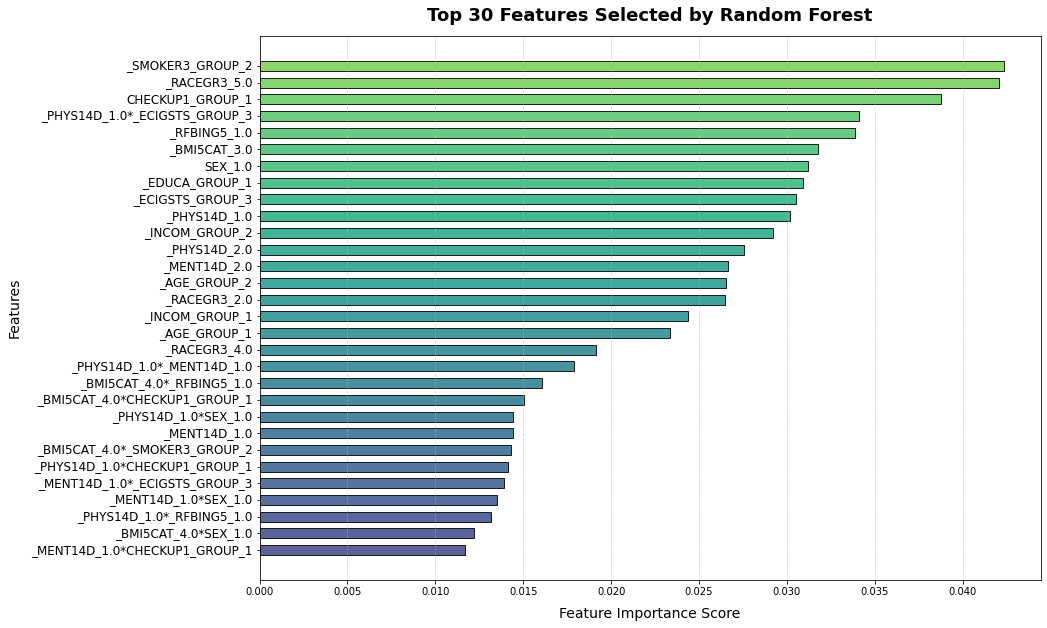

In [ ]:
import matplotlib.pyplot as plt

# Sort by importance
sorted_idx = np.argsort(final_importance_scores)
sorted_features = np.array(final_selected_features)[sorted_idx]
sorted_importance = final_importance_scores[sorted_idx]

colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(sorted_features)))


plt.figure(figsize=(14, 10)) 
bars = plt.barh(sorted_features, sorted_importance, color=colors, edgecolor='black', alpha=0.85, height=0.6)


plt.gca().set_yticks(np.arange(len(sorted_features)))
plt.gca().set_yticklabels(sorted_features, fontsize=12, verticalalignment="center")


plt.xlabel("Feature Importance Score", fontsize=14, labelpad=10)
plt.ylabel("Features", fontsize=14, labelpad=10)
plt.title("Top 30 Features Selected by Random Forest", fontsize=18, fontweight='bold', pad=15)


plt.grid(axis="x", linestyle="--", alpha=0.5)

plt.show()



In [ ]:
# Find the feature importance of "_SMOKER3_GROUP_2"
feature_name = "_SMOKER3_GROUP_2"


# Ensure feature is in the sorted feature list
if feature_name in sorted_features:
    idx = np.where(sorted_features == feature_name)[0][0]
    importance_value = sorted_importance[idx]
    print(f"Feature: {feature_name}")
    print(f"Importance Score (VIMP): {importance_value:.5f}")
else:
    print(f"Feature '{feature_name}' not found in selected features.")


Feature: _SMOKER3_GROUP_2
Importance Score (VIMP): 0.04233


In [ ]:
final_selected_features

Index(['_MENT14D_1.0*CHECKUP1_GROUP_1', '_BMI5CAT_4.0*SEX_1.0',
       '_PHYS14D_1.0*_RFBING5_1.0', '_MENT14D_1.0*SEX_1.0',
       '_MENT14D_1.0*_ECIGSTS_GROUP_3', '_PHYS14D_1.0*CHECKUP1_GROUP_1',
       '_BMI5CAT_4.0*_SMOKER3_GROUP_2', '_MENT14D_1.0', '_PHYS14D_1.0*SEX_1.0',
       '_BMI5CAT_4.0*CHECKUP1_GROUP_1', '_BMI5CAT_4.0*_RFBING5_1.0',
       '_PHYS14D_1.0*_MENT14D_1.0', '_RACEGR3_4.0', '_AGE_GROUP_1',
       '_INCOM_GROUP_1', '_RACEGR3_2.0', '_AGE_GROUP_2', '_MENT14D_2.0',
       '_PHYS14D_2.0', '_INCOM_GROUP_2', '_PHYS14D_1.0', '_ECIGSTS_GROUP_3',
       '_EDUCA_GROUP_1', 'SEX_1.0', '_BMI5CAT_3.0', '_RFBING5_1.0',
       '_PHYS14D_1.0*_ECIGSTS_GROUP_3', 'CHECKUP1_GROUP_1', '_RACEGR3_5.0',
       '_SMOKER3_GROUP_2'],
      dtype='object')

In [ ]:
X_final = X_with_interactions[final_selected_features]
X_final = sm.add_constant(X_final)
y = data1['_LTASTH1'].reset_index(drop=True)

model_final = sm.Logit(y, X_final).fit()
print(model_final.summary())

Optimization terminated successfully.
         Current function value: 0.381857
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               _LTASTH1   No. Observations:               307208
Model:                          Logit   Df Residuals:                   307177
Method:                           MLE   Df Model:                           30
Date:                Thu, 06 Mar 2025   Pseudo R-squ.:                 0.05066
Time:                        20:29:05   Log-Likelihood:            -1.1731e+05
converged:                       True   LL-Null:                   -1.2357e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -1.1277      0.037    -30.892      0.

In [103]:
print(f"The final number of features selected: {len(final_selected_features)}")
print("The features finally selected are:", final_selected_features)

The final number of features selected: 30
The features finally selected are: Index(['_MENT14D_1.0*CHECKUP1_GROUP_1', '_BMI5CAT_4.0*SEX_1.0',
       '_PHYS14D_1.0*_RFBING5_1.0', '_MENT14D_1.0*SEX_1.0',
       '_MENT14D_1.0*_ECIGSTS_GROUP_3', '_PHYS14D_1.0*CHECKUP1_GROUP_1',
       '_BMI5CAT_4.0*_SMOKER3_GROUP_2', '_MENT14D_1.0', '_PHYS14D_1.0*SEX_1.0',
       '_BMI5CAT_4.0*CHECKUP1_GROUP_1', '_BMI5CAT_4.0*_RFBING5_1.0',
       '_PHYS14D_1.0*_MENT14D_1.0', '_RACEGR3_4.0', '_AGE_GROUP_1',
       '_INCOM_GROUP_1', '_RACEGR3_2.0', '_AGE_GROUP_2', '_MENT14D_2.0',
       '_PHYS14D_2.0', '_INCOM_GROUP_2', '_PHYS14D_1.0', '_ECIGSTS_GROUP_3',
       '_EDUCA_GROUP_1', 'SEX_1.0', '_BMI5CAT_3.0', '_RFBING5_1.0',
       '_PHYS14D_1.0*_ECIGSTS_GROUP_3', 'CHECKUP1_GROUP_1', '_RACEGR3_5.0',
       '_SMOKER3_GROUP_2'],
      dtype='object')


## Machine learning based on previously selected features

In [ ]:
data1['_LTASTH1'].value_counts()

_LTASTH1
0    264659
1     42549
Name: count, dtype: int64

In [ ]:
#Dataset Partitioning
from sklearn.model_selection import train_test_split
y = data1['_LTASTH1']
X = data1.iloc[:,1:]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(245766, 41)
(61442, 41)
(245766,)
(61442,)


In [ ]:
y_train1.value_counts()

_LTASTH1
0    211727
1     34039
Name: count, dtype: int64

In [ ]:
y_test1.value_counts()

_LTASTH1
0    52932
1     8510
Name: count, dtype: int64

### Model performance calculation function

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import f1_score


import warnings
warnings.filterwarnings("ignore")

def model_evaluation(y_test, y_pred):
  
    confusion = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion.ravel()  

    
    sensitivity = tp / (tp + fn)  
    specificity = tn / (tn + fp)  

 
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)


    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion)
    print("Classification Report:\n", report)
    print("F1 Score:", f1)
    print("AUC Score:", auc_roc)
    print("Sensitivity (Recall):", sensitivity)
    print("Specificity:", specificity)


### Model construction

1.1 Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve

clf = DecisionTreeClassifier()


clf.fit(X_train1, y_train1)



y_test_probs = clf.predict_proba(X_test1)[:, 1]  

# Calculate the optimal classification threshold
fpr, tpr, thresholds = roc_curve(y_test1, y_test_probs)
optimal_idx = (tpr - fpr).argmax()  
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold from ROC: {optimal_threshold}")
# Reclassify using the optimal threshold
y_test_pred = (y_test_probs > optimal_threshold).astype(int)

model_evaluation(y_test1, y_test_pred)

Optimal threshold from ROC: 0.1643835616438356
Accuracy: 0.7176686956804792
Confusion Matrix:
 [[41274 11658]
 [ 5689  2821]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83     52932
           1       0.19      0.33      0.25      8510

    accuracy                           0.72     61442
   macro avg       0.54      0.56      0.54     61442
weighted avg       0.78      0.72      0.75     61442

F1 Score: 0.2454217234329462
AUC Score: 0.5556237597438942
Sensitivity (Recall): 0.33149236192714454
Specificity: 0.7797551575606438


1.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clfRT = RandomForestClassifier(n_estimators=100, random_state=42)

clfRT.fit(X_train1, y_train1)



y_test_probs = clfRT.predict_proba(X_test1)[:, 1] 



fpr, tpr, thresholds = roc_curve(y_test1, y_test_probs)
optimal_idx = (tpr - fpr).argmax()  
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold from ROC: {optimal_threshold}")

y_test_pred = (y_test_probs > optimal_threshold).astype(int)



model_evaluation(y_test1, y_test_pred )

Optimal threshold from ROC: 0.13579534354534348
Accuracy: 0.6425083818886104
Confusion Matrix:
 [[35305 17627]
 [ 4338  4172]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.67      0.76     52932
           1       0.19      0.49      0.28      8510

    accuracy                           0.64     61442
   macro avg       0.54      0.58      0.52     61442
weighted avg       0.79      0.64      0.70     61442

F1 Score: 0.27529776634003106
AUC Score: 0.5786173009771622
Sensitivity (Recall): 0.4902467685076381
Specificity: 0.6669878334466863


1.3 GBDT

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBDT1 = GradientBoostingClassifier(n_estimators=100, random_state=42)


GBDT1.fit(X_train1, y_train1)


y_test_probs = GBDT1.predict_proba(X_test1)[:, 1]  


fpr, tpr, thresholds = roc_curve(y_test1, y_test_probs)
optimal_idx = (tpr - fpr).argmax() 
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold from ROC: {optimal_threshold}")

y_test_pred = (y_test_probs > optimal_threshold).astype(int)

model_evaluation(y_test1, y_test_pred)

Optimal threshold from ROC: 0.14083095139138432
Accuracy: 0.6582305263500537
Confusion Matrix:
 [[35716 17216]
 [ 3783  4727]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.67      0.77     52932
           1       0.22      0.56      0.31      8510

    accuracy                           0.66     61442
   macro avg       0.56      0.62      0.54     61442
weighted avg       0.81      0.66      0.71     61442

F1 Score: 0.3104456047023282
AUC Score: 0.6151083362348678
Sensitivity (Recall): 0.5554641598119859
Specificity: 0.6747525126577496


1.4 XGBoost

In [ ]:
from xgboost import XGBClassifier
import numpy as np


xgbc = XGBClassifier(learning_rate=0.1,
                    n_estimators=20,
                    seed=27,
                    verbosity=1)


xgbc.fit(X_train1, y_train1)


y_test_probs = xgbc.predict_proba(X_test1)[:, 1]  



fpr, tpr, thresholds = roc_curve(y_test1, y_test_probs)
optimal_idx = (tpr - fpr).argmax()  
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold from ROC: {optimal_threshold}")

y_test_pred = (y_test_probs > optimal_threshold).astype(int)

model_evaluation(y_test1, y_test_pred)


Optimal threshold from ROC: 0.14941276609897614
Accuracy: 0.6504671071905211
Confusion Matrix:
 [[35174 17758]
 [ 3718  4792]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.66      0.77     52932
           1       0.21      0.56      0.31      8510

    accuracy                           0.65     61442
   macro avg       0.56      0.61      0.54     61442
weighted avg       0.81      0.65      0.70     61442

F1 Score: 0.30856406954282034
AUC Score: 0.6138075963458159
Sensitivity (Recall): 0.5631022326674501
Specificity: 0.6645129600241819


1.5 LightGBM

In [ ]:
# from lightgbm import LGBMClassifier
import lightgbm as lgb


gbm = lgb.LGBMClassifier(num_leaves=31,
                        learning_rate=0.05,
                        n_estimators=20)


gbm.fit(X_train1, y_train1,
        eval_set=[(X_test1, y_test1)],
        eval_metric='l1',
        callbacks=[lgb.early_stopping(5)])



y_test_probs = gbm.predict_proba(X_test1,num_iteration=gbm.best_iteration_)[:, 1] 



fpr, tpr, thresholds = roc_curve(y_test1, y_test_probs)
optimal_idx = (tpr - fpr).argmax() 
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold from ROC: {optimal_threshold}")

y_test_pred = (y_test_probs > optimal_threshold).astype(int)

model_evaluation(y_test1, y_test_pred)



[LightGBM] [Info] Number of positive: 34039, number of negative: 211727
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 82
[LightGBM] [Info] Number of data points in the train set: 245766, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.138502 -> initscore=-1.827791
[LightGBM] [Info] Start training from score -1.827791
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's l1: 0.232229	valid_0's binary_logloss: 0.385628
Optimal threshold from ROC: 0.14589326533252747
Accuracy: 0.6736434360860649
Confusion Matrix:
 [[36954 15978]
 [ 4074  4436]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79     52932
           

## Machine Learning Model Optimization - Hyperparameter Tuning/Balanced Data/Threshold adjustment

###  SMOTE & undersampler

In [106]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Split features and labels
X = data1.iloc[:, 1:]  
y = data1['_LTASTH1']

# Define the data resampling pipeline: Undersampling first, then oversampling (SMOTE)
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.5, random_state=42)),  # Let the minority class expand to 50% of the majority class)
    ('under', RandomUnderSampler(sampling_strategy=0.8, random_state=42))  
])

# Apply Pipeline for data balancing
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# New DataFrame
data_resampled = pd.concat([pd.DataFrame(y_resampled, columns=['_LTASTH1']), pd.DataFrame(X_resampled, columns=X.columns)], axis=1)



# New Dataset Partitioning
y_resampled_final = data_resampled['_LTASTH1']
X_resampled_final = data_resampled.iloc[:, 1:]

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_final, y_resampled_final, test_size=0.2, random_state=42, stratify=y_resampled_final
)


print(f"Number of training set samples: {X_train.shape[0]}, Number of test set samples: {X_test.shape[0]}")
print(f"Training set category distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test set category distribution:\n{y_test.value_counts(normalize=True)}")


Number of training set samples: 238192, Number of test set samples: 59548
Training set category distribution:
_LTASTH1
0    0.555556
1    0.444444
Name: proportion, dtype: float64
Test set category distribution:
_LTASTH1
0    0.555552
1    0.444448
Name: proportion, dtype: float64


### Improve the model

##  2.1 The current optimal model of decision tree

In [111]:
from sklearn.tree import DecisionTreeClassifier


clf_DT = DecisionTreeClassifier(max_depth=18,
                                random_state=42,
                                criterion='gini',
                                min_samples_leaf=3,
                                min_samples_split=5,
                                class_weight='balanced')


clf_DT.fit(X_train, y_train)


y_train_probs = clf_DT.predict_proba(X_train)[:, 1]


y_test_probs = clf_DT.predict_proba(X_test)[:, 1]



fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
optimal_idx = (tpr - fpr).argmax()  
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal threshold from ROC: {optimal_threshold}")



THRESHOLD1 = 0.45


y_train_pred = (y_train_probs > THRESHOLD1).astype(int)
y_test_pred = (y_test_probs > THRESHOLD1).astype(int)


print(" \n🔹Training set")
model_evaluation(y_train, y_train_pred)


print(" \n🔹Testing Set")
model_evaluation(y_test, y_test_pred)


Optimal threshold from ROC: 0.5238099950466129
 
🔹Training set
Accuracy: 0.7030840666353194
Confusion Matrix:
 [[90545 41784]
 [28939 76924]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.68      0.72    132329
           1       0.65      0.73      0.69    105863

    accuracy                           0.70    238192
   macro avg       0.70      0.71      0.70    238192
weighted avg       0.71      0.70      0.70    238192

F1 Score: 0.6850750987438272
AUC Score: 0.7054394035295151
Sensitivity (Recall): 0.7266372575876369
Specificity: 0.6842415494713933
 
🔹Testing Set
Accuracy: 0.6710552831329347
Confusion Matrix:
 [[21627 11455]
 [ 8133 18333]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.65      0.69     33082
           1       0.62      0.69      0.65     26466

    accuracy                           0.67     59548
   macro avg       0.67      0.67      

## 2.2 The current optimal model of random forest

### Hyperparameter tuning of random forest can help determine the optimal parameter range. (It takes a long time to run)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Defining Hyperparameter Ranges
param_dist = {
    'n_estimators': np.arange(100, 300, 50),  # Number of trees
    'max_depth': np.arange(10, 20, 5),  #Maximum depth of the tree
    'min_samples_split': np.arange(5, 20, 5),  # Minimum number of samples required for internal node repartitioning
    'min_samples_leaf': np.arange(1, 10, 3),  # Minimum number of samples required for a leaf node
    'max_features': ['sqrt', 0.5],  # Maximum number of features to select
    'class_weight': ['balanced']  # Balancing Class Weights
}


clf = RandomForestClassifier(random_state=42)

# Perform random search optimization
random_search = RandomizedSearchCV(clf, param_dist, n_iter=20, cv=3, scoring='roc_auc', random_state=42, n_jobs=-1, verbose=2)
random_search.fit(X_resampled_final, y_resampled_final)

#Get the best parameters
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)


best_clf = RandomForestClassifier(**best_params, random_state=42)
best_clf.fit(X_resampled_final, y_resampled_final)


y_pred_Resample = best_clf.predict(X_resampled_final)


model_evaluation(y_resampled_final, y_pred_Resample)


In [108]:
from sklearn.ensemble import RandomForestClassifier

#  Create a random forest classifier + adjust parameters (you can refer to the results of hyperparameter optimization, but it is only for reference)
clf = RandomForestClassifier(
    n_estimators=300,  
    max_features=0.8,  
    random_state=99,
    min_samples_leaf=50,
    min_samples_split=25, 
    class_weight="balanced"
)


clf.fit(X_train, y_train)


y_train_probs = clf.predict_proba(X_train)[:, 1]


y_test_probs = clf.predict_proba(X_test)[:, 1]

# Set threshold
#Threshold adjustment, the optimal threshold is around 0.13 but the model performance is very poor, so we manually adjust it
THRESHOLD1 = 0.45


y_train_pred = (y_train_probs > THRESHOLD1).astype(int)
y_test_pred = (y_test_probs > THRESHOLD1).astype(int)


print("\n🔹 **Training set results**")
model_evaluation(y_train, y_train_pred)


print("\n🔹 **Test set results**")
model_evaluation(y_test, y_test_pred)



🔹 **Training set results**
Accuracy: 0.6919963726741453
Confusion Matrix:
 [[88215 44114]
 [29250 76613]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71    132329
           1       0.63      0.72      0.68    105863

    accuracy                           0.69    238192
   macro avg       0.69      0.70      0.69    238192
weighted avg       0.70      0.69      0.69    238192

F1 Score: 0.6762257822498786
AUC Score: 0.6951667092053693
Sensitivity (Recall): 0.7236994984083202
Specificity: 0.6666339200024182

🔹 **Test set results**
Accuracy: 0.6768993081211796
Confusion Matrix:
 [[21573 11509]
 [ 7731 18735]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.65      0.69     33082
           1       0.62      0.71      0.66     26466

    accuracy                           0.68     59548
   macro avg       0.68      0.68      0.68     59548
weighted av

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_parameter_change = RandomForestClassifier(n_estimators=150, max_depth= 15 , min_samples_leaf= 5, min_samples_split=8,class_weight={0:1, 1: 1.5} , random_state=42)


clf_parameter_change.fit(X_resampled_final, y_resampled_final)

y_probs = clf_parameter_change.predict_proba(X_resampled_final)[:, 1] 

THRESHOLD = 0.43
y_pred_adjusted = (y_probs > THRESHOLD).astype(int)

model_evaluation(y_resampled_final, y_pred_adjusted)

## 2.3 xgb currently the best model

In [112]:

from xgboost import XGBClassifier
import numpy as np


xgbc = XGBClassifier(learning_rate=0.05,
                    n_estimators=300,
                    seed=27,
                    max_depth=5,
                    gamma=0.4,
                    scale_pos_weight=1.5,
                    verbosity=1)


xgbc.fit(X_train, y_train)



y_train_probs2 = xgbc.predict_proba(X_train)[:, 1]


y_test_probs2 = xgbc.predict_proba(X_test)[:, 1]

THRESHOLD1 = 0.45


y_train_pred2 = (y_train_probs2 > THRESHOLD1).astype(int)
y_test_pred2 = (y_test_probs2 > THRESHOLD1).astype(int)


print("\n🔹 **Training set results**")
model_evaluation(y_train, y_train_pred2)


print("\n🔹 **Test set results**")
model_evaluation(y_test, y_test_pred2)
#Random forest is a powerful but simple ensemble learning method that can provide good performance in many cases without much feature engineering.
#XGBoost relies more on feature selection and parameter tuning
#So the results may not be as good as rf
#This needs further adjustment



🔹 **Training set results**
Accuracy: 0.6965557197554914
Confusion Matrix:
 [[88049 44280]
 [27998 77865]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.67      0.71    132329
           1       0.64      0.74      0.68    105863

    accuracy                           0.70    238192
   macro avg       0.70      0.70      0.70    238192
weighted avg       0.70      0.70      0.70    238192

F1 Score: 0.6830023507947088
AUC Score: 0.7004527876789144
Sensitivity (Recall): 0.7355261044935435
Specificity: 0.6653794708642853

🔹 **Test set results**
Accuracy: 0.69370927655001
Confusion Matrix:
 [[21895 11187]
 [ 7052 19414]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.66      0.71     33082
           1       0.63      0.73      0.68     26466

    accuracy                           0.69     59548
   macro avg       0.70      0.70      0.69     59548
weighted avg 

### Hyperparameter tuning xgb can be used as an auxiliary parameter adjustment (this takes a long time to run)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'scale_pos_weight': [1, 1.2, 1.5],
    'gamma': [0, 0.1, 0.2],  
    'subsample': [0.8, 1] 
}

grid_search = GridSearchCV(XGBClassifier(seed=27), param_grid, cv=3, scoring='f1')
grid_search.fit(X_resampled_final, y_resampled_final)
print(grid_search.best_params_)


## LGB is currently the best model


In [113]:
import pandas as pd
import numpy as np

# from lightgbm import LGBMClassifier
import lightgbm as lgb


gbm = lgb.LGBMClassifier(num_leaves=50,
                        learning_rate=0.05,
                        n_estimators=50)


gbm.fit(X_train, y_train,
        eval_set=[(X_train, y_train)],
        eval_metric='l1',
        callbacks=[lgb.early_stopping(15)])  # Enable early_stopping to avoid overfitting, and stop automatically if there is no improvement after 15 rounds.


y_train_probs3 = gbm.predict_proba(X_train, num_iteration=gbm.best_iteration_)[:, 1]

y_test_probs3 = gbm.predict_proba(X_test, num_iteration=gbm.best_iteration_)[:, 1]



THRESHOLD1 = 0.43


y_train_pred3 = (y_train_probs3 > THRESHOLD1).astype(int)
y_test_pred3 = (y_test_probs3 > THRESHOLD1).astype(int)


print("\n🔹 **Training set results**")
model_evaluation(y_train, y_train_pred3)


print("\n🔹 **Test set results**")
model_evaluation(y_test, y_test_pred3)

[LightGBM] [Info] Number of positive: 105863, number of negative: 132329
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10455
[LightGBM] [Info] Number of data points in the train set: 238192, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.444444 -> initscore=-0.223145
[LightGBM] [Info] Start training from score -0.223145
Training until validation scores don't improve for 15 rounds

🔹 **Training set results**
Accuracy: 0.7026684355477933
Confusion Matrix:
 [[98558 33771]
 [37051 68812]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.74    132329
           1       0.67      0.65      0.66    105863

    accuracy                           0.70    238192
   macro avg       0.70     

## GBDT Model

In [116]:

from sklearn.ensemble import GradientBoostingClassifier


gbdt = GradientBoostingClassifier(n_estimators=400, random_state=42)


gbdt.fit(X_resampled_final, y_resampled_final)

y_probs = gbdt.predict_proba(X_resampled_final)[:, 1]

#Cannot be lower than 0.3, otherwise the specificity is too low
THRESHOLD = 0.35
y_pred_adjusted3 = (y_probs > THRESHOLD).astype(int)

model_evaluation(y_resampled_final, y_pred_adjusted3)


Accuracy: 0.6996708537650299
Confusion Matrix:
 [[111531  53880]
 [ 35540  96789]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.67      0.71    165411
           1       0.64      0.73      0.68    132329

    accuracy                           0.70    297740
   macro avg       0.70      0.70      0.70    297740
weighted avg       0.71      0.70      0.70    297740

F1 Score: 0.6840260355196857
AUC Score: 0.7028464465581388
Sensitivity (Recall): 0.7314269736792388
Specificity: 0.6742659194370386


## The subsequent attempts are not important, just try

### Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
import lightgbm as lgb
import xgboost as xgb

# Define base model
base_models = [
    ('rf', RandomForestClassifier(n_estimators=300, max_depth=10, class_weight="balanced")),
    ('lgbm', lgb.LGBMClassifier(num_leaves=50,learning_rate=0.05,n_estimators=50, class_weight="balanced")),
    ('xgb', xgb.XGBClassifier(learning_rate=0.05,n_estimators=300,seed=27, max_depth=5, gamma=0.4,scale_pos_weight=1.5,verbosity=1))
]

# Defining the metamodel
meta_model = LogisticRegression()


stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)


stacking_clf.fit(X_train, y_train)


y_train_probs = stacking_clf.predict_proba(X_train)[:, 1]


y_test_probs = stacking_clf.predict_proba(X_test)[:, 1]


THRESHOLD = 0.39


y_train_pred = (y_train_probs > THRESHOLD).astype(int)
y_test_pred = (y_test_probs > THRESHOLD).astype(int)


print("\n🔹 **Training set results**")
model_evaluation(y_train, y_train_pred)


print("\n🔹 **Test set results**")
model_evaluation(y_test, y_test_pred)
